# Test GoData preparation

In [1]:
%matplotlib inline 

#%matplotlib notebook
#matplotlib widget
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy     as np
import pandas    as pd
from   scipy     import stats
import os
import matplotlib.pyplot as plt

import xyimg.dataprep as dp
import xyimg.detsim   as dsim

In [3]:
pressure = '5bar'
sample   = '1eroi'

path      = os.environ['LPRDATADIR']
ifilename = path + dp.filename_voxel(pressure, sample)
ofile     = 'temp.h5'
print(ifilename)

/scratch/next/data/NEXT100/pressure_topology/voxel_dataset_5bar_1eroi.h5


In [4]:
voxels = pd.read_hdf(ifilename, 'voxels')

In [5]:
dxs = dp.get_frame(voxels)
print('frame ', dxs, ', maximum', np.max(dxs))

frame  (276, 281, 304) , maximum 304


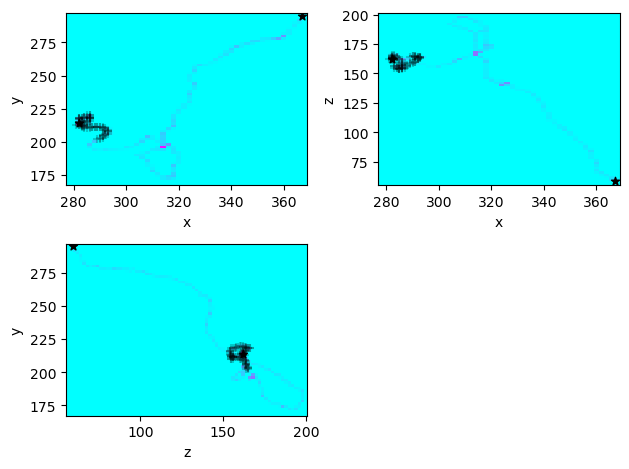

In [6]:
ievt = 24
evt = dsim.df_event(voxels, 1, ievt)
dsim.plot_event(evt, seg = 2, ext = 1)

,file_id,event,x,y,z,E,binclass,segclass,track_id,nhits,ext,nie,Enorma
10922,1,24,-36.991853,-9.720978,14.266802,0.043704,0,3,0,6,1,1748,0.017780
10923,1,24,-35.991853,-9.720978,14.266802,0.022112,0,3,0,4,1,884,0.008996
10924,1,24,-35.991853,-9.720978,15.266802,0.007146,0,3,0,1,1,286,0.002907


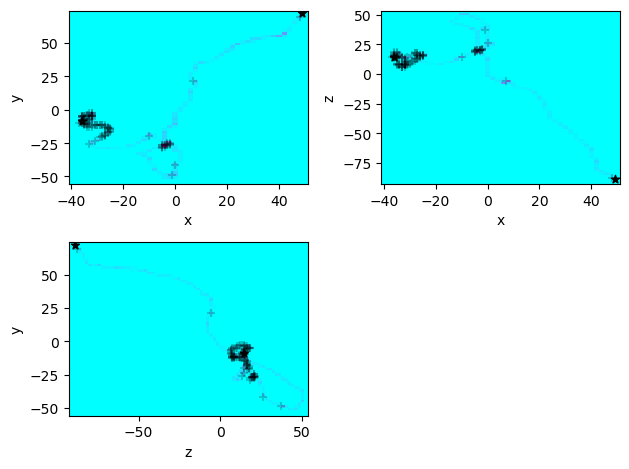

In [7]:
pevt = dp.evt_preparation(evt)
dsim.plot_event(pevt, seg = 2, ext = 2)
pevt[:3]

In [8]:
dp.test_evt_preparation(evt)

True

In [9]:
dfie = dp.evt_ielectrons(pevt)
dfie[:10]

,hit_id,x,y,z,E,segclass,ext,track_id,file_id,event,binclass
0,0,-36.592457,-9.648367,14.036964,0.000025,3,1,0,1,24,0
1,0,-37.661029,-9.160884,14.874264,0.000025,3,1,0,1,24,0
2,0,-37.202212,-10.097719,14.214941,0.000025,3,1,0,1,24,0
3,0,-36.957453,-10.417605,14.913185,0.000025,3,1,0,1,24,0
4,0,-37.139564,-9.966742,14.129987,0.000025,3,1,0,1,24,0
5,0,-37.075130,-10.297411,15.060975,0.000025,3,1,0,1,24,0
6,0,-37.784630,-9.206270,14.018788,0.000025,3,1,0,1,24,0
7,0,-37.129673,-8.894132,14.469107,0.000025,3,1,0,1,24,0
8,0,-36.085337,-9.600213,13.353159,0.000025,3,1,0,1,24,0
9,0,-36.030590,-10.479512,13.771890,0.000025,3,1,0,1,24,0


In [10]:
dp.test_evt_ielectron(pevt)

True

In [11]:
sigma = (10, 10, 10)
dfies = dp.evt_ielectrons_diffuse(dfie, sigma, copy = True)

In [12]:
dp.test_evt_ielectrons_diffuse(dfie)

True

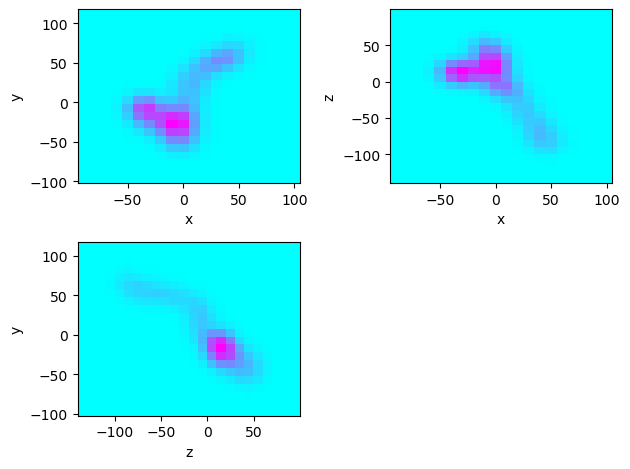

In [20]:
dsim.plot_event(dfies, width = 10)

In [26]:
shot = dp.evt_shot(dfies, pevt, width = (10, 10))

y   0
id  (1, 24)


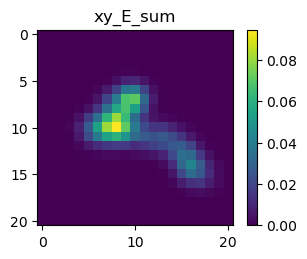

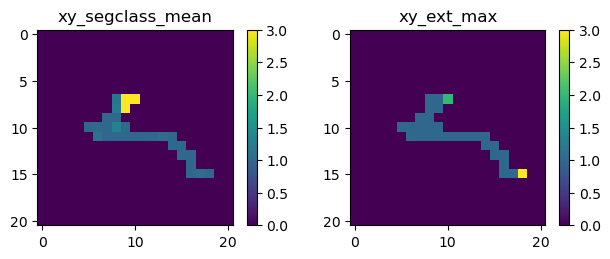

<Figure size 640x480 with 0 Axes>

In [27]:
dp.plot_godata(shot)

In [29]:
import time as time

In [30]:
ievt   = 30
sigma = (4, 4, 4)
evt0  = dsim.df_event(voxels, 1, ievt)
t0    = time.time()
evt1  = dp.evt_preparation(evt0)
dfie0 = dp.evt_ielectrons(evt1, transfer_info = False)
dfie1 = dp.evt_ielectrons_diffuse(dfie0, sigma)
shot  = dp.evt_shot(dfie1, width = (10, 10))
t1    = time.time()
print('time ', t1 - t0)

time  0.06529879570007324


In [83]:
ifilename = ifilename
ofilename = 'test_shots.npz'
sigma     = (10, 10, 10)
width     = (10, 10, 10)
frame     = 120
xlabel    = ('xy_E_sum', 'xy_z_mean', 'yz_E_sum', 'yz_x_mean', 'zx_E_sum', 'zx_y_mean')
zlabel    = ('xy_segclass_mean', 'xy_ext_max', 'yz_segclass_mean', 'yz_ext_max', 'zx_segclass_mean', 'zx_ext_max')
nevents   = 100

shots = dp.run(ifilename, ofilename, sigma = sigma, width = width, frame = frame, nevents = nevents,
              xlabel = xlabel, zlabel = zlabel)
#sigma = sigma, width = width, frame = frame,
#        projection = projection, xlabel = xlabel, zlabel = zlabel, nevents = nevents)


input  filename       /scratch/next/data/NEXT100/pressure_topology/voxel_dataset_5bar_1eroi.h5
output filename       test_shots.npz
sigma diffusion (mm)  (10, 10, 10)
widths          (mm)  (10, 10, 10)
frame           (mm)  120
xlabel                ('xy_E_sum', 'xy_z_mean', 'yz_E_sum', 'yz_x_mean', 'zx_E_sum', 'zx_y_mean')
zlabel                ('xy_segclass_mean', 'xy_ext_max', 'yz_segclass_mean', 'yz_ext_max', 'zx_segclass_mean', 'zx_ext_max')
events                100
opening voxel file :  /scratch/next/data/NEXT100/pressure_topology/voxel_dataset_5bar_1eroi.h5
processing event  100 , id  (2, 41)
save godata filename : test_shots.npz
save file without extension  test_shots
event processed   101 
time per event    0.18 s
time execution        18.4  s
done!


In [91]:
shots = dp.godata_load('/scratch/next/data/NEXT100/pressure_topology/shots/5bar_1eroi_s4mm_w4mm.npz')

y   0
id  [ 1 45]


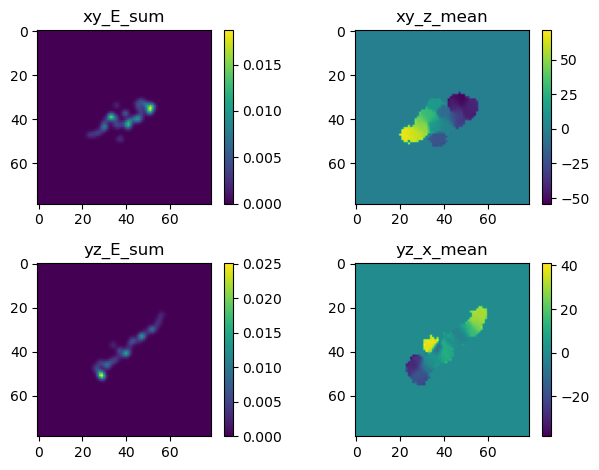

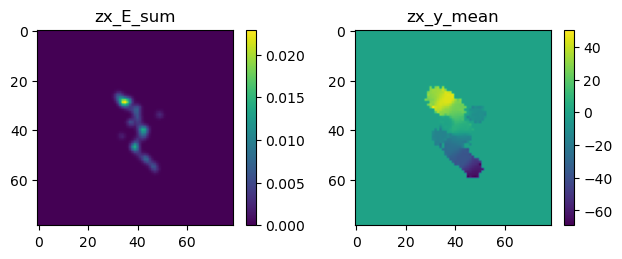

<Figure size 640x480 with 0 Axes>

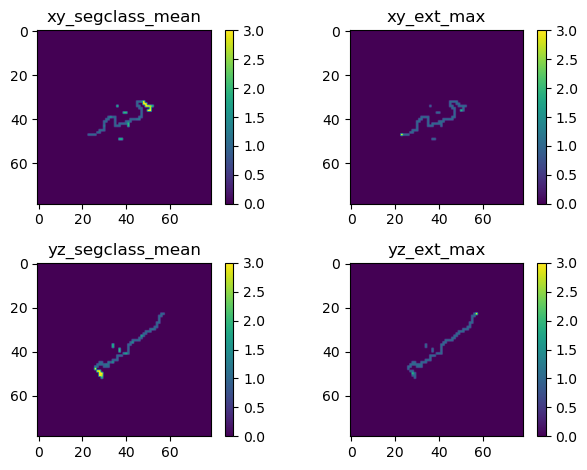

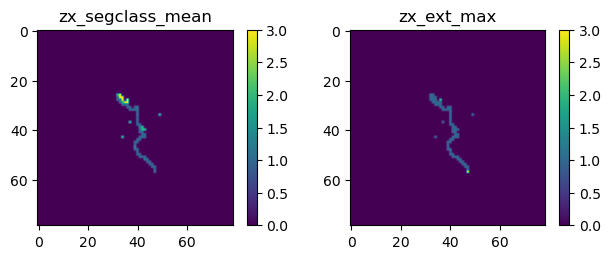

<Figure size 640x480 with 0 Axes>

In [92]:
dp.plot_godata(shots, 45)

In [95]:
132*10/(60*60)

0.36666666666666664

In [85]:
xshots = dp.godata_load(ofilename)

y   0
id  [ 1 45]


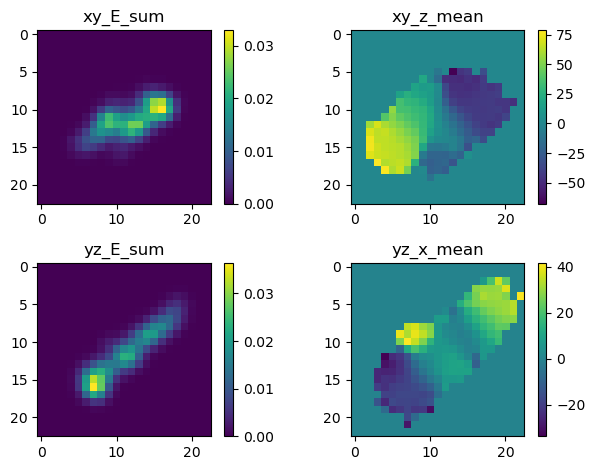

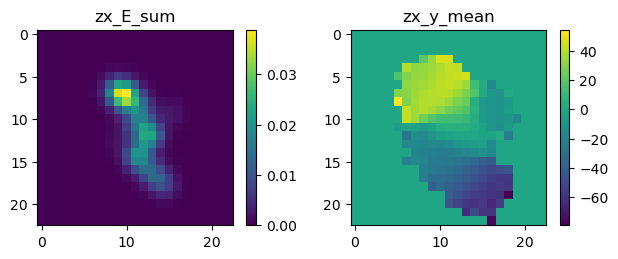

<Figure size 640x480 with 0 Axes>

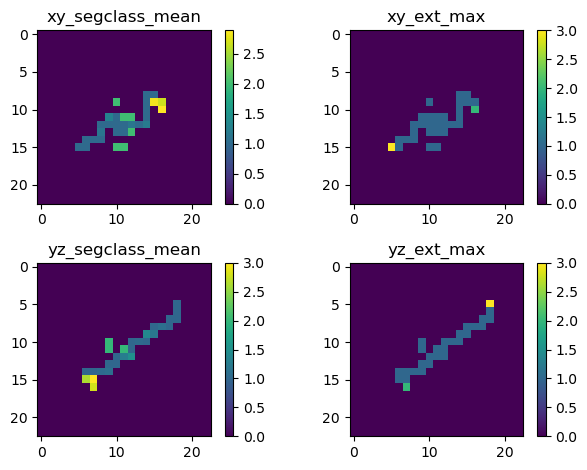

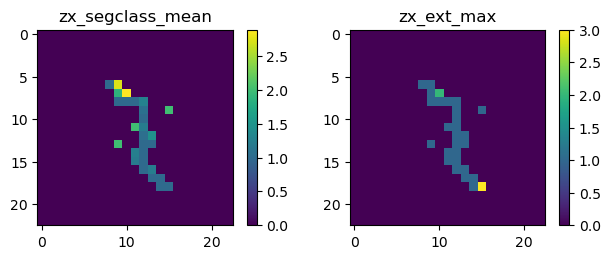

<Figure size 640x480 with 0 Axes>

In [86]:
dp.plot_godata(xshots, 45)

In [62]:
ximg = shots.xdic['xy_E_count'][75]
np.sum(ximg)

98318.0

In [168]:
dfies

,hit_id,x,y,z,E,segclass,ext,track_id,binclass,file_id,event
0,0,-50.081925,-9.440288,17.248475,0.000025,3,1,0,0,1,24
1,0,-39.675938,-14.965410,7.940230,0.000025,3,1,0,0,1,24
2,0,-15.566704,-0.620820,20.742616,0.000025,3,1,0,0,1,24
3,0,-52.272373,-14.347009,-4.783568,0.000025,3,1,0,0,1,24
4,0,-40.189213,-16.234373,14.499261,0.000025,3,1,0,0,1,24
...,...,...,...,...,...,...,...,...,...,...,...
98309,490,60.166113,86.264321,-88.100209,0.000025,1,3,0,0,1,24
98310,490,43.348967,46.131078,-86.191070,0.000025,1,3,0,0,1,24
98311,490,54.575766,54.399723,-105.535788,0.000025,1,3,0,0,1,24
98312,490,35.136517,68.395307,-86.982526,0.000025,1,3,0,0,1,24


y   0
id  (1, 30)


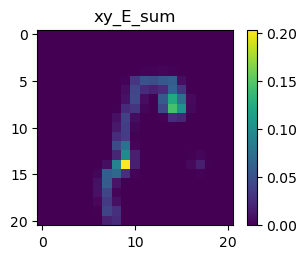

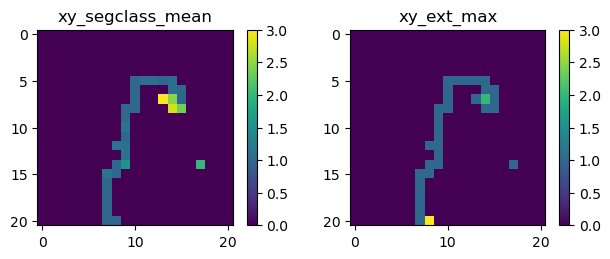

<Figure size 640x480 with 0 Axes>

In [166]:
dp.plot_godata(shot)

In [58]:
devt = dsim.diff_ievoxel(evt, (2, 2, 2), (10, 10, 10), (10, 10, 10))

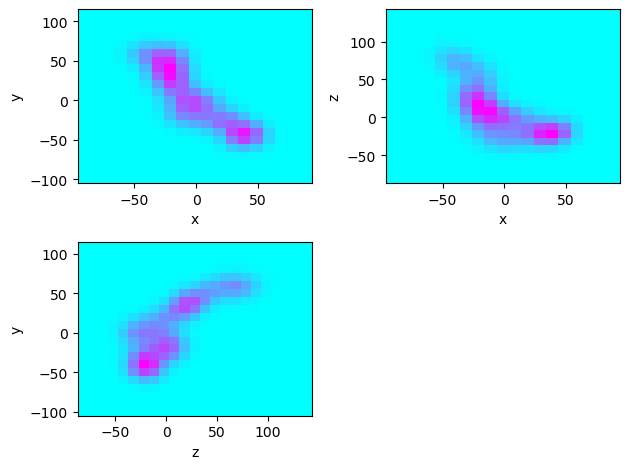

In [130]:
smeared = True
inevt = devt if smeared else evt
pevt = dp.evt_preparation(devt, smeared = smeared)
dsim.plot_event(pevt, ext = 2, width = 10)

In [131]:
frame = 160
width = (10, 10)
xlabel = ['xy_E_sum', 'xy_E_count',
          'xz_E_sum', 'xz_E_count',
          'zy_E_sum', 'zy_E_count']
zlabel = ['xy_segclass_max', 'xy_ext_max',
          'xz_segclass_max', 'xz_ext_max',
          'zy_segclass_max', 'zy_ext_max']
bins   = [np.arange(-frame, frame, w) for w in width]
gdata = dp.evt_godata(pevt, xlabel, zlabel, bins);


y   0
id  (1, 27)


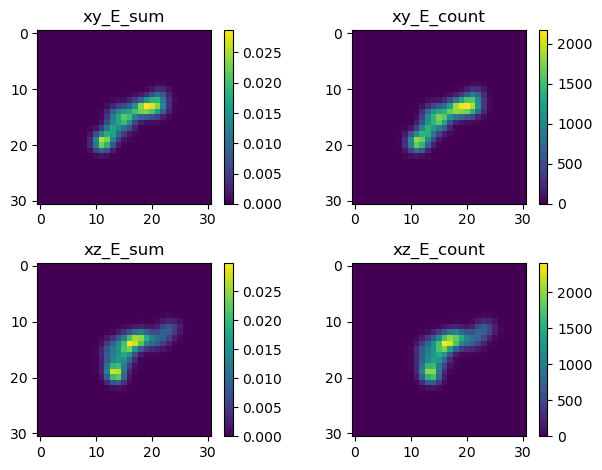

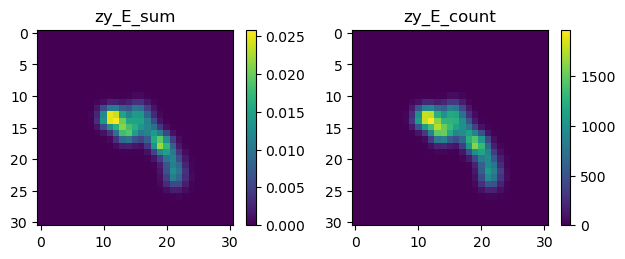

<Figure size 640x480 with 0 Axes>

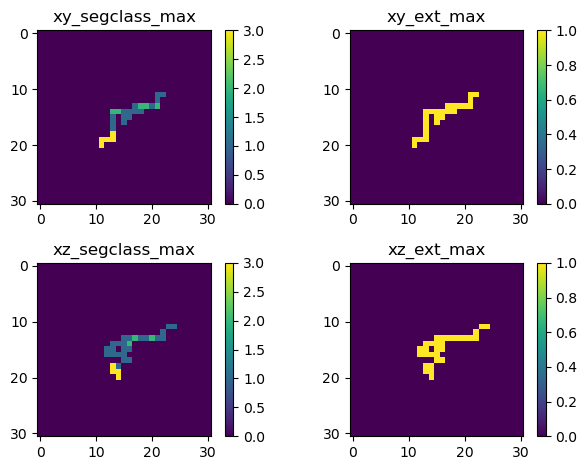

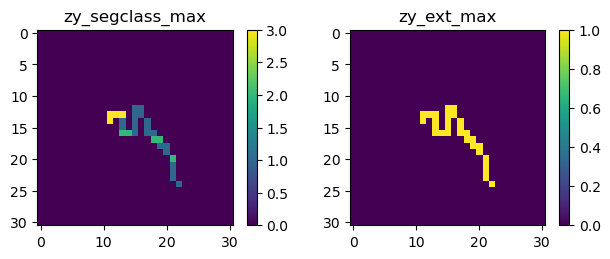

<Figure size 640x480 with 0 Axes>

In [132]:
dp.plot_godata(gdata)


In [10]:
odata = dp.godata_init(xlabel, zlabel)
for i in range(10):
    evt   = dsim.df_event(voxels, 1, i)
    sevt  = dp.evt_preparation(evt)
    gdata = dp.evt_godata(sevt, xlabel, zlabel, bins)
    dp.godata_append(odata, gdata)

y   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
id  [(1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9)]


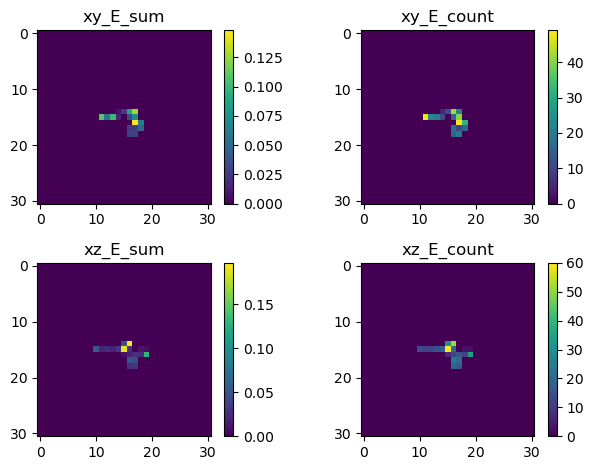

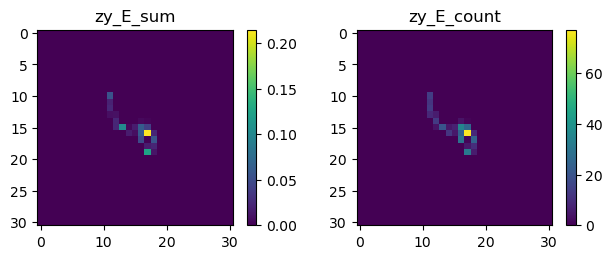

<Figure size 640x480 with 0 Axes>

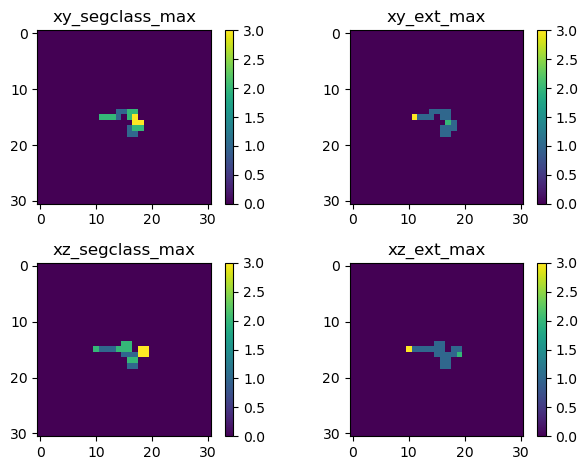

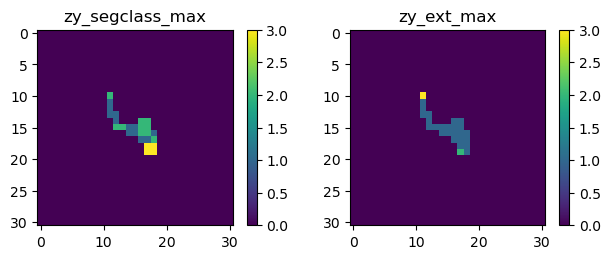

<Figure size 640x480 with 0 Axes>

In [12]:
ievt = 8
dp.plot_godata(odata, ievt)


In [15]:
ofilename   = 'test_godata.npz'
nevents     = 100
frame       = 160
xlabel      = ['E_sum', 'E_count']
dp.run(ifilename, ofilename, frame = frame, xlabel = xlabel, nevents = nevents)

input  filename  /scratch/next/data/NEXT100/pressure_topology/voxel_dataset_5bar_1eroi.h5
output filename  test_godata.npz
projection       ['xy', 'xz', 'zy']
widths     (mm)  (10, 10)
frame      (mm)  160
xlabel           ['E_sum', 'E_count']
zlabel           ['segclass_max', 'ext_max']
events           100
x labels  ['xy_E_sum', 'xy_E_count', 'xz_E_sum', 'xz_E_count', 'zy_E_sum', 'zy_E_count']
z labels  ['xy_segclass_max', 'xy_ext_max', 'xz_segclass_max', 'xz_ext_max', 'zy_segclass_max', 'zy_ext_max']
opening  /scratch/next/data/NEXT100/pressure_topology/voxel_dataset_5bar_1eroi.h5
processing event  100 , id  (2, 41)
save godata at  test_godata.npz
save file without extension  test_godata
event processed   101 
time per event    0.16 s
time execution        15.8  s
done!


In [16]:
gdata = dp.godata_load('test_godata.npz')

y   0
id  [ 1 10]


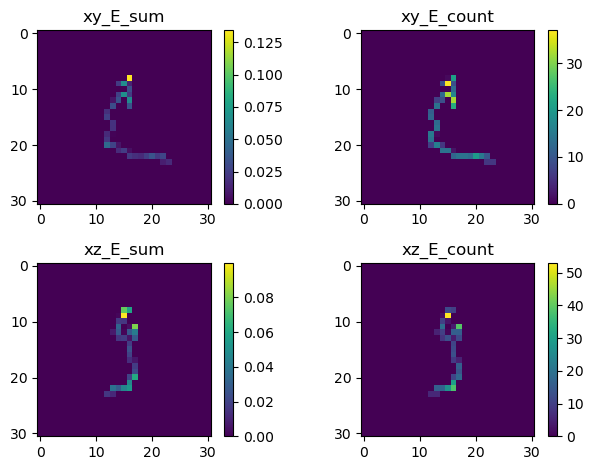

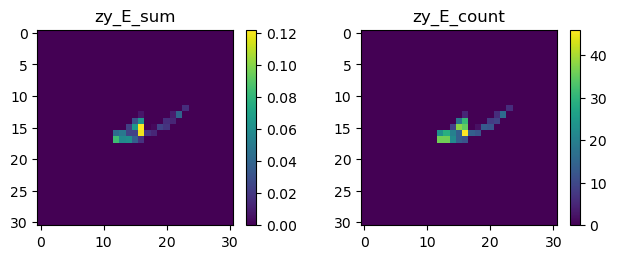

<Figure size 640x480 with 0 Axes>

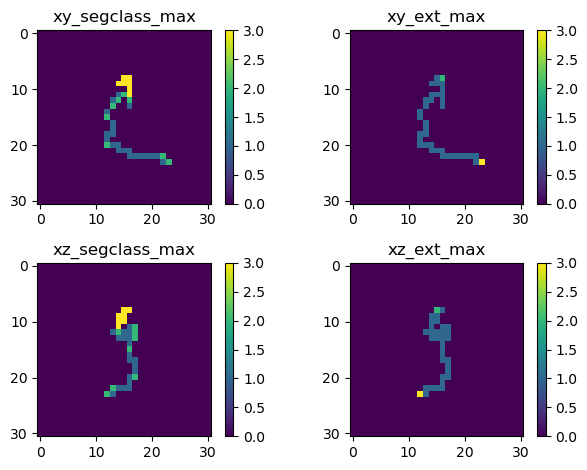

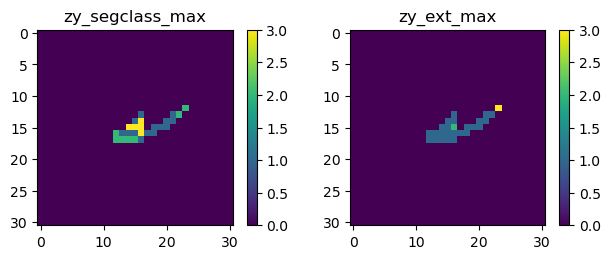

<Figure size 640x480 with 0 Axes>

In [18]:
ievt = 10
dp.plot_godata(gdata, 10)